In [2]:
import pandas as pd
import warnings
from pandas import Series, DataFrame
warnings.filterwarnings("ignore")

In [46]:

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
def filter1(s,f):
    if s==f:
        return 0
    else:
        return float(s)
def transform(input_data):
    input_data['Coupon_requirement']=input_data['coupon_requirement'].map(lambda x: filter1(x,'null'))
    input_data['Equivalent_discount']=input_data['equivalent_discount'].map(lambda x: filter1(x,'fixed'))
    input_data['Fixed']=input_data['equivalent_discount'].map(lambda x: int(x=='fixed'))
    return input_data.drop(['coupon_requirement','equivalent_discount'],axis=1)

In [19]:

def fillna_pipeline(input_data):
    input_data=transform(input_data)
    input_data['Num_coupon_used'].fillna(0,inplace=True)
    input_data['Difference'].fillna(input_data['Difference'].mean(),inplace=True)
    input_data['money'].fillna(input_data['money'].mean(),inplace=True)
    input_data['Tot_coupon_sent'].fillna(input_data['Tot_coupon_sent'].mean(),inplace=True)
    input_data['num_type'].fillna(input_data['num_type'].mean(),inplace=True)
    input_data["Customer's Total Usage for Merchant's Coupons"].fillna(input_data["Customer's Total Usage for Merchant's Coupons"].mean(),inplace=True)
    input_data["Customer's Total Usage Fraction for Merchant"].fillna(input_data["Customer's Total Usage Fraction for Merchant"].mean(),inplace=True)
    input_data["Customer's Total Received by Merchant"].fillna(input_data["Customer's Total Received by Merchant"].mean(),inplace=True)
    input_data["Merchant's Total Usage Fraction"].fillna(input_data["Merchant's Total Usage Fraction"].mean(),inplace=True)
    input_data["Customer's Inbox Share by Merchant"].fillna(input_data["Customer's Inbox Share by Merchant"].mean(),inplace=True)
    print 'fill completed'
    return input_data

In [41]:
y_train1=pd.read_csv('y_train1.csv',header=None)
y_test1=pd.read_csv('y_test1.csv',header=None)

In [42]:
X_train1=fillna_pipeline(pd.read_csv('X_train1.csv'))
X_test1=fillna_pipeline(pd.read_csv('X_test1.csv'))

fill completed
fill completed


In [43]:
y_train2=pd.read_csv('y_train2.csv',header=None)
y_test2=pd.read_csv('y_test2.csv',header=None)
X_train2=fillna_pipeline(pd.read_csv('X_train2.csv'))
X_test2=fillna_pipeline(pd.read_csv('X_test2.csv'))

fill completed
fill completed


In [13]:
GBDT = GradientBoostingClassifier(n_estimators=150,max_depth=5 )
model=GBDT.fit(X_train1, y_train1)



In [14]:
y1_GBDTpredicted_test = GBDT.predict(X_test1)
metrics.accuracy_score(y_test1,y1_GBDTpredicted_test)

0.76818734241506281

In [15]:
score=GBDT.predict_proba(X_test1)

In [16]:
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])


AUC socre for GBDT is  0.834147037792


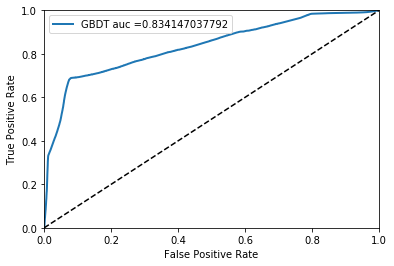

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT auc =', auc)
print 'AUC socre for GBDT is ', str(auc)

plt.legend(loc=0)

In [32]:
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(max_depth=15)
GBM_model=gbm.fit(X_train1, y_train1)

In [33]:
score1=GBM_model.predict_proba(X_test1)
score_XG=[]
for i in score1:
    score_XG.append(i[1])

In [42]:
gbm = xgb.XGBClassifier(max_depth=15)
GBM_model2=gbm.fit(X_train2, y_train2)

In [45]:
score2=GBM_model2.predict_proba(X_test2)
score_XG2=[]
for i in score2:
    score_XG2.append(i[1])

AUC socre for XG is  0.821755506446


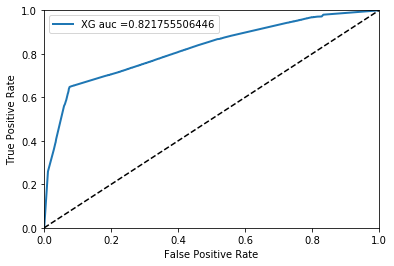

In [46]:
fpr, tpr, thresholds = roc_curve(y_test2, score_XG2)
auc = roc_auc_score(y_test2, score_XG2)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [37]:
GBM_model.feature_importances_

array([ 0.08081403,  0.14412491,  0.0836494 ,  0.02550601,  0.06086829,
        0.03541137,  0.01101005,  0.01968799,  0.08056854,  0.04426115,
        0.11624996,  0.1290275 ,  0.08286384,  0.08595697,  0.        ], dtype=float32)

AUC socre for XG is  0.959087730168


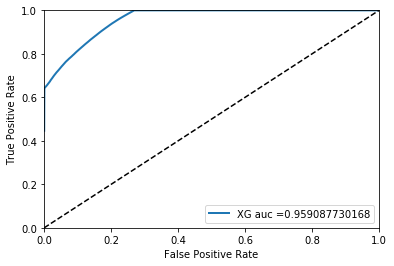

In [34]:
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [5]:
y_train=pd.read_csv('y_full_train.csv',header=None)
y_test=pd.read_csv('y_full_test.csv',header=None)
X_train=fillna_pipeline(pd.read_csv('X_full_train.csv'))
X_test=fillna_pipeline(pd.read_csv('X_full_test.csv'))

fill completed
fill completed


In [50]:
GBM_model2=gbm.fit(X_train, y_train)

Final Test set AUC socre for XG is  0.854786754456


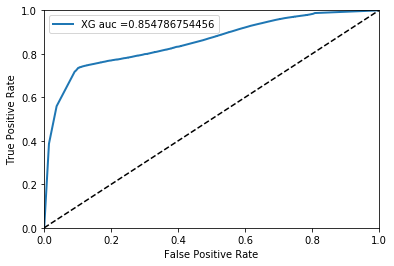

In [51]:
score2=GBM_model2.predict_proba(X_test)
score_XG2=[]
for i in score2:
    score_XG2.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_XG2)
auc = roc_auc_score(y_test, score_XG2)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'Final Test set AUC socre for XG is ', str(auc)
plt.legend(loc=0)

In [52]:
sorted(zip(X_train.columns,GBM_model2.feature_importances_),key=lambda x:x[1])

[('Fixed', 0.0),
 ("Customer's Total Usage for Merchant's Coupons", 0.015312243),
 ("Customer's Total Received by Merchant", 0.022561353),
 ("Customer's Total Usage Fraction for Merchant", 0.0381735),
 ('Num_coupon_used', 0.039930079),
 ('num_type', 0.057992872),
 ("Customer's Inbox Share by Merchant", 0.059929393),
 ('Coupon_requirement', 0.076843984),
 ("Merchant's Total Usage Fraction", 0.078369208),
 ('Equivalent_discount', 0.079166092),
 ('Tot_coupon_sent', 0.07972306),
 ('Date_received_week', 0.082173705),
 ('Difference', 0.10886516),
 ('money', 0.11460619),
 ('Date_received_month', 0.14635317)]

In [40]:
sorted(zip(X_train1.columns,GBM_model.feature_importances_),key=lambda x:x[1])

[('Fixed', 0.0),
 ("Customer's Total Usage for Merchant's Coupons", 0.011010053),
 ("Customer's Total Received by Merchant", 0.019687988),
 ('Num_coupon_used', 0.025506008),
 ("Customer's Total Usage Fraction for Merchant", 0.035411373),
 ("Customer's Inbox Share by Merchant", 0.044261146),
 ('num_type', 0.060868286),
 ("Merchant's Total Usage Fraction", 0.080568545),
 ('Date_received_week', 0.080814034),
 ('Coupon_requirement', 0.082863837),
 ('Tot_coupon_sent', 0.083649397),
 ('Equivalent_discount', 0.085956968),
 ('Difference', 0.11624996),
 ('money', 0.1290275),
 ('Date_received_month', 0.14412491)]

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'rank:pairwise',
    'eval_metric': 'auc',
    'gamma': 0.1,
    'min_child_weight': 1.1,
    'max_depth': 5,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.01,
    'tree_method': 'exact',
    'seed': 0,
    'nthread': 12
}

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob

In [22]:
Scaler = StandardScaler()
sX_train = Scaler.fit_transform(X_train)
sX_train = DataFrame(sX_train)
sX_test = Scaler.transform(X_test)
sX_test = DataFrame(sX_test)

In [23]:
sX_train = Scaler.fit_transform(X_train)
sX_train = DataFrame(sX_train)
sX_test = Scaler.transform(X_test)
sX_test = DataFrame(sX_test)

AUC socre for MLP is  0.590493600861


0.34680980504743936

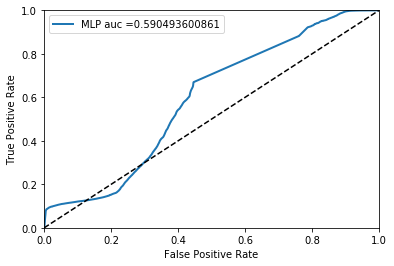

In [55]:

mlp1 = MLPClassifier(hidden_layer_sizes=(25,25,25,25,25,15), random_state=10, activation='tanh', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05,momentum=0.7, nesterovs_momentum=True)
MLP_model1=mlp1.fit(sX_train,y_train)
score3=MLP_model1.predict_proba(sX_test)
score_NN1=[]
for i in score3:
    score_NN1.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_NN1)
auc = roc_auc_score(y_test, score_NN1)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)
plt.legend(loc=0)
y_pred1 = MLP_model1.predict(sX_test)
metrics.accuracy_score(y_test,y_pred1)

AUC socre for MLP is  0.64201288312


0.73739507286796269

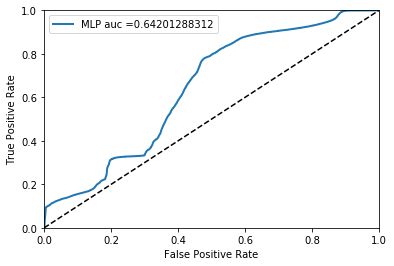

In [51]:
Scaler = StandardScaler()
sX_train = Scaler.fit_transform(X_train)
sX_train = DataFrame(sX_train)
sX_test = Scaler.transform(X_test)
sX_test = DataFrame(sX_test)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30,30,30,20), activation='tanh', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05,momentum=0.7, nesterovs_momentum=True)
MLP_model=mlp.fit(sX_train,y_train)
score2=MLP_model.predict_proba(sX_test)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_NN)
auc = roc_auc_score(y_test, score_NN)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)
plt.legend(loc=0)
y_pred = MLP_model.predict(sX_test)
metrics.accuracy_score(y_test,y_pred)

In [39]:
MLP_model=mlp.fit(sX_train,y_train)


In [40]:
score2=MLP_model.predict_proba(sX_test)
score_NN=[]
for i in score2:
    score_NN.append(i[1])

AUC socre for MLP is  0.747447812895


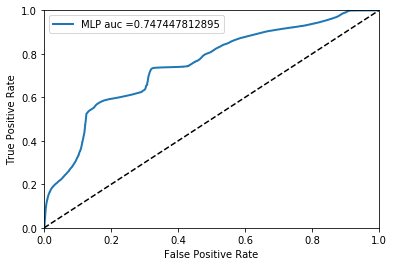

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, score_NN)
auc = roc_auc_score(y_test, score_NN)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)
plt.legend(loc=0)

AUC socre for MLP is  0.747447812895


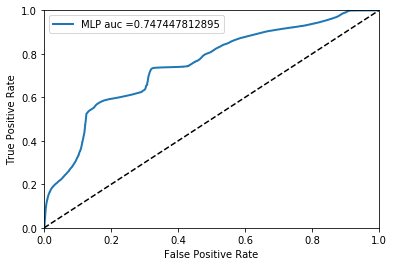

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, score_NN)
auc = roc_auc_score(y_test, score_NN)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)
plt.legend(loc=0)

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [36]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

In [37]:
ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

AUC socre for AB is  0.818554511717


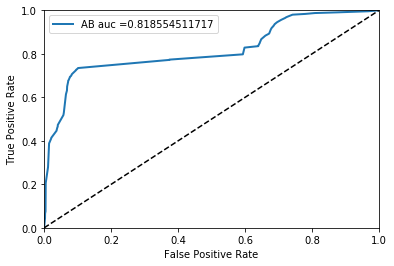

In [40]:
score3=ABC.predict_proba(X_test)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test, score_AB)
auc = roc_auc_score(y_test, score_AB)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)
plt.legend(loc=0)

In [8]:
from sklearn.svm import SVC


In [ ]:
GaussianSVC = SVC(kernel='rbf',C=0.5)
GaussianSVC.fit(X_train1, y_train1)

In [ ]:
score4=GaussianSVC.predict_proba(X_test1)
score_SVC=[]
for i in score4:
    score_SVC.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_SVC)
auc = roc_auc_score(y_test1, score_SVC)
plot_roc_curve(fpr, tpr, 'SVC auc =', auc)
print 'AUC socre for SVC is ', str(auc)
plt.legend(loc=0)

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK
labels = y_train

In [ ]:
def Mixed_model(argsDict):
    max_depth = argsDict["max_depth"]
    n_estimators = argsDict['n_estimators'] 
    learning_rate = argsDict["learning_rate"] 
    subsample = argsDict["subsample"] 
    min_child_weight = argsDict["min_child_weight"]
    ada_estimators = argsDict['ada_estimators']
    ada_depth = argsDict["ada_depth"] 
    ada_para=argsDict["ada_para"]

    ......

    metric = (roc_auc_score(y_test1, score1)+roc_auc_score(y_test2, score2))/2
    print metric
    return -metric

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK




def GBM(argsDict):
    max_depth = argsDict["max_depth"] + 5
    n_estimators = argsDict['n_estimators'] * 5 + 50
    learning_rate = argsDict["learning_rate"] * 0.02 + 0.05
    subsample = argsDict["subsample"] * 0.1 + 0.7
    min_child_weight = argsDict["min_child_weight"]+1
    ada_estimators = argsDict['ada_estimators'] * 10 + 100
    ada_depth = argsDict["ada_depth"] 
    ada_para=argsDict["ada_para"] 
    
    print "max_depth:" + str(max_depth)
    print "n_estimator:" + str(n_estimators)
    print "learning_rate:" + str(learning_rate)
    print "subsample:" + str(subsample)
    print "min_child_weight:" + str(min_child_weight)
    print 'ada_estimators'+str(ada_estimators)
    print 'ada_depth'+str(ada_depth)
    print 'ada_para'+str(ada_para)
    
    gbm = xgb.XGBClassifier(nthread=4,   
                            max_depth=max_depth,  
                            n_estimators=n_estimators,  
                            learning_rate=learning_rate, 
                            subsample=subsample,      
                            min_child_weight=min_child_weight,   
                            max_delta_step = 10,  
                            objective="binary:logistic")
    ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_depth),
                         algorithm="SAMME",
                         n_estimators=ada_estimators)
    ABC_model1=gbm.fit(X_train1, y_train1)
    scoreADA1=ABC_model1.predict_proba(X_test1)
    
    GBM_model1=gbm.fit(X_train1, y_train1)
    scoreGBM1=GBM_model1.predict_proba(X_test1)
    final_score1=scoreADA1*ada_para+scoreGBM1*(1-ada_para)
    score_1=[]
    for i in final_score1:
        score_1.append(i[1])
        
    ABC_model2=gbm.fit(X_train2, y_train2)
    scoreADA2=ABC_model1.predict_proba(X_test2)
    
    GBM_model2=gbm.fit(X_train2, y_train2)
    scoreGBM2=GBM_model2.predict_proba(X_test2)
    final_score2=scoreADA2*ada_para+scoreGBM2*(1-ada_para)
    score_2=[]
    for i in final_score2:
        score_2.append(i[1]) 



    metric = (roc_auc_score(y_test1, score1)+roc_auc_score(y_test2, score2))/2
    print metric
    return -metric

space = {"max_depth":hp.randint("max_depth",15),
         "n_estimators":hp.randint("n_estimators",10),  #[0,1,2,3,4,5] -> [50,]
         "learning_rate":hp.randint("learning_rate",6),  #[0,1,2,3,4,5] -> 0.05,0.06
         "subsample":hp.randint("subsample",4),#[0,1,2,3] -> [0.7,0.8,0.9,1.0]
         "min_child_weight":hp.randint("min_child_weight",5), #
         "ada_depth":hp.randint("ada_depth",5),
         "ada_estimators":hp.randint("ada_estimators",10),
         "ada_para":hp.uniform("ada_para",0,1)
        }
algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(GBM,space,algo=algo,max_evals=1000)

print best
print GBM(best)

In [ ]:
space = {"max_depth":hp.randint("max_depth",15)+5, #[5,6,7...]
         "learning_rate":hp.l("learning_rate",6),  
         "subsample":hp.randint("subsample",4),
         "min_child_weight":hp.randint("min_child_weight",5), 
         "ada_depth":hp.randint("ada_depth",5),
         "ada_estimators":hp.randint("ada_estimators",10),
         "ada_para":hp.uniform("ada_para",0,1)
        }

In [ ]:
mix_algo = partial(
    mix.suggest, p_suggest=[(0.1, rand.suggest), (0.9, tpe.suggest)])
best = fmin(Mixed_model, space, algo=mix_algo, max_evals=1000r, trials=trials)
print best
print Mixed_model(best)

In [67]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK




def GBM(argsDict):
    max_depth = argsDict["max_depth"] + 5
    n_estimators = argsDict['n_estimators'] * 5 + 50
    learning_rate = argsDict["learning_rate"] * 0.02 + 0.05
    subsample = argsDict["subsample"] * 0.1 + 0.7
    min_child_weight = argsDict["min_child_weight"]+1
    ada_estimators = argsDict['ada_estimators'] * 10 + 100
    ada_depth = argsDict["ada_depth"] 
    ada_para=argsDict["ada_para"] 
    
    print "max_depth:" + str(max_depth)
    print "n_estimator:" + str(n_estimators)
    print "learning_rate:" + str(learning_rate)
    print "subsample:" + str(subsample)
    print "min_child_weight:" + str(min_child_weight)
    print 'ada_estimators'+str(ada_estimators)
    print 'ada_depth'+str(ada_depth)
    print 'ada_para'+str(ada_para)
    
    gbm = xgb.XGBClassifier(nthread=4,   
                            max_depth=max_depth,  
                            n_estimators=n_estimators,  
                            learning_rate=learning_rate, 
                            subsample=subsample,      
                            min_child_weight=min_child_weight,   
                            max_delta_step = 10,  
                            objective="binary:logistic")
    ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_depth),
                         algorithm="SAMME",
                         n_estimators=ada_estimators)
    ABC_model1=gbm.fit(X_train1, y_train1)
    scoreADA1=ABC_model1.predict_proba(X_test1)
    
    GBM_model1=gbm.fit(X_train1, y_train1)
    scoreGBM1=GBM_model1.predict_proba(X_test1)
    final_score1=scoreADA1*ada_para+scoreGBM1*(1-ada_para)
    score_1=[]
    for i in final_score1:
        score_1.append(i[1])
        
    ABC_model2=gbm.fit(X_train2, y_train2)
    scoreADA2=ABC_model1.predict_proba(X_test2)
    
    GBM_model2=gbm.fit(X_train2, y_train2)
    scoreGBM2=GBM_model2.predict_proba(X_test2)
    final_score2=scoreADA2*ada_para+scoreGBM2*(1-ada_para)
    score_2=[]
    for i in final_score2:
        score_2.append(i[1]) 



    metric = (roc_auc_score(y_test1, score_1)+roc_auc_score(y_test2, score_2))/2
    print metric
    return -metric

space = {"max_depth":hp.randint("max_depth",15),
         "n_estimators":hp.randint("n_estimators",10),  
         "learning_rate":hp.randint("learning_rate",6),  
         "subsample":hp.randint("subsample",4),
         "min_child_weight":hp.randint("min_child_weight",5), 
         "ada_depth":hp.randint("ada_depth",5),
         "ada_estimators":hp.randint("ada_estimators",10),
         "ada_para":hp.uniform("ada_para",0,1)
        }
algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(GBM,space,algo=algo,max_evals=4)

print best
print GBM(best)

max_depth:9
n_estimator:80
learning_rate:0.15
subsample:0.7
min_child_weight:1
ada_estimators160
ada_depth3
ada_para0.677271716014
0.886121486454
max_depth:9
n_estimator:80
learning_rate:0.15
subsample:0.7
min_child_weight:1
ada_estimators160
ada_depth3
ada_para0.731993493957
0.886121486441
max_depth:11
n_estimator:85
learning_rate:0.13
subsample:0.8
min_child_weight:1
ada_estimators190
ada_depth3
ada_para0.0596741704251
0.888422830827
max_depth:11
n_estimator:85
learning_rate:0.13
subsample:0.8
min_child_weight:2
ada_estimators190
ada_depth1
ada_para0.0535418840421
0.884900518292
{'ada_depth': 3, 'ada_estimators': 9, 'learning_rate': 4, 'ada_para': 0.05967417042506784, 'min_child_weight': 0, 'n_estimators': 7, 'subsample': 1, 'max_depth': 6}
max_depth:11
n_estimator:85
learning_rate:0.13
subsample:0.8
min_child_weight:1
ada_estimators190
ada_depth3
ada_para0.0596741704251
0.888422830827
-0.888422830827


In [126]:
SVC()

NameError: name 'SVC' is not defined

In [ ]:
max_depth:11
n_estimator:85
learning_rate:0.13
subsample:0.8
min_child_weight:1
ada_estimators190
ada_depth3
ada_para0.0596741704251

In [56]:
y_test1.shape

(275645, 1)

In [ ]:
print len(testIndex)
attr_train = X_train2
print attr_train.shape
attr_test = X_test2
print attr_test.shape
label_train = y_train2[0]
print len(label_train)
label_test = y_test2[0]
print len(label_test)



    metric = cross_val_score(gbm,attr_train,label_train,cv=1,scoring="roc_auc").mean()
    print metric
    return -metric

space = {"max_depth":hp.randint("max_depth",15),
         "n_estimators":hp.randint("n_estimators",10),  #[0,1,2,3,4,5] -> [50,]
         "learning_rate":hp.randint("learning_rate",6),  #[0,1,2,3,4,5] -> 0.05,0.06
         "subsample":hp.randint("subsample",4),#[0,1,2,3] -> [0.7,0.8,0.9,1.0]
         "min_child_weight":hp.randint("min_child_weight",5), #
        }
algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(GBM,space,algo=algo,max_evals=4)

print best
print GBM(best)

In [ ]:
max_depth:13
n_estimator:70
learning_rate:0.13
subsample:0.9
min_child_weight:5

In [60]:
gbm = xgb.XGBClassifier(max_depth=13,n_estimator=70,learning_rate=0.13,subsample=0.9,min_child_weight=5)

In [61]:
GBM_model=gbm.fit(X_train, y_train)
score=GBM_model.predict_proba(X_test)
score_XG=[]
for i in score:
    score_XG.append(i[1])


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
fpr, tpr, thresholds = roc_curve(y_test, score_XG)
auc = roc_auc_score(y_test, score_XG)
plot_roc_curve(fpr, tpr, 'XGBoost auc =', auc)
print 'Final Test set AUC socre for XG is ', str(auc)
plt.legend(loc=0)

NameError: name 'score_XG' is not defined

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'rank:pairwise',
    'eval_metric': 'auc',
    'gamma': 0.1,
    'min_child_weight': 1.1,
    'max_depth': 5,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.01,
    'tree_method': 'exact',
    'seed': 0,
    'nthread': 12
}

In [ ]:
ada_estimators190
ada_depth3
ada_para0.0596741704251   

In [73]:
gbm = xgb.XGBClassifier(nthread=4,max_depth=11,n_estimator=85,learning_rate=0.13,objective="binary:logistic")
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                     algorithm="SAMME",
                     n_estimators=190)
ABC_model1=gbm.fit(X_train, y_train)
scoreADA1=ABC_model1.predict_proba(X_test)

GBM_model1=gbm.fit(X_train, y_train)
scoreGBM1=GBM_model1.predict_proba(X_test)
ada_para=0.0596741704251
final_score1=scoreADA1*ada_para+scoreGBM1*(1-ada_para)
score_1=[]
for i in final_score1:
    score_1.append(i[1])




Final Test set AUC socre for XG is  0.850808243823


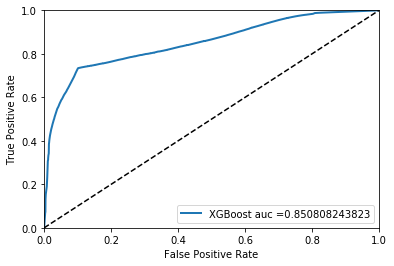

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, score_1)
auc = roc_auc_score(y_test, score_1)
plot_roc_curve(fpr, tpr, 'XGBoost auc =', auc)
print 'Final Test set AUC socre for XG is ', str(auc)
plt.legend(loc=0)


In [48]:
y_pred = MLP_model.predict(sX_test)
metrics.accuracy_score(y_test,y_pred)

0.73859814617340658

In [1]:
from surprise import SVD
import surprise
from surprise import evaluate, print_perf

In [20]:
X_train=fillna_pipeline(pd.read_csv('X_full_train.csv'))
X_test=fillna_pipeline(pd.read_csv('X_full_test.csv'))

fill completed
fill completed


In [7]:
y_train=pd.read_csv('y_full_train.csv',header=None)
y_test=pd.read_csv('y_full_test.csv',header=None)
X_train=transform(pd.read_csv('X_full_train.csv'))
X_test=transform(pd.read_csv('X_full_test.csv'))

In [9]:
data=X_test.split(n_folds=3)
algo = SVD()

# Evaluate performances of our algorithm on the dataset.
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

AttributeError: 'DataFrame' object has no attribute 'split'

In [43]:
X_full_train.csv

,Date_received_week,Date_received_month,Tot_coupon_sent,Num_coupon_used,num_type,Customer's Total Usage Fraction for Merchant,Customer's Total Usage for Merchant's Coupons,Customer's Total Received by Merchant,Merchant's Total Usage Fraction,Customer's Inbox Share by Merchant,Difference,money,Coupon_requirement,Equivalent_discount,Fixed
0,4,13,35140.0,0.0,123.0,0.000000,0,6,0.210273,1.000000,3.000000,520.000000,500.0,0.900000,0
1,3,17,1607.0,0.0,11.0,0.000000,0,1,0.168015,0.250000,18.000000,170.000000,50.0,0.900000,0
2,1,5,248.0,0.0,4.0,0.000000,0,1,0.088710,0.250000,18.000000,170.000000,30.0,0.966667,0
3,2,6,35140.0,0.0,123.0,0.000000,0,2,0.210273,0.500000,18.000000,170.000000,300.0,0.833333,0
4,3,17,35140.0,0.0,123.0,0.000000,0,2,0.210273,0.500000,18.000000,170.000000,300.0,0.900000,0
5,3,21,1824.0,0.0,25.0,0.000000,0,3,0.372807,0.166667,17.000000,150.000000,300.0,0.833333,0
6,5,14,217.0,0.0,27.0,0.000000,0,2,0.331797,0.111111,17.000000,150.000000,10.0,0.500000,0
7,6,13,59.0,0.0,5.0,0.000000,0,2,0.220339,0.111111,17.000000,150.000000,10.0,0.500000,0
8,3,10,1825.0,0.0,13.0,0.000000,0,5,0.477260,0.277778,17.000000,150.000000,500.0,0.900000,0
9,3,21,1824.0,0.0,25.0,0.000000,0,3,0.372807,0.166667,17.000000,150.000000,200.0,0.850000,0


In [ ]:
x_money['money_quantile']= pd.qcut(x_money['money'],10,labels=[1,2,3,4,5,6,7,8,9,10])